<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

In [1]:
np.random.rand()                # Give one number

0.3218764722181169

### 1.2 NumPy’s PRNG

In [2]:
np.random.rand(10)              # Give ten numbers`

array([0.07583293, 0.94179037, 0.85414584, 0.84409563, 0.87695101,
       0.55403637, 0.22963192, 0.65901094, 0.35264379, 0.25541772])

In [3]:
np.random.rand(5,2)             # Give five sets of 2

array([[0.87088246, 0.07323646],
       [0.7724464 , 0.43630613],
       [0.80485916, 0.06219992],
       [0.66408477, 0.95190511],
       [0.63077498, 0.27319844]])

In [6]:
n = 10000
random_numbers = np.random.rand(n)

In [8]:
# The numbers less than .25 must be about 25%
np.sum(random_numbers < .25) / n * 100

25.019999999999996

In [7]:
# The numbers less than .5 must be about 50%
np.sum(random_numbers < .5) / n * 100

50.21

### 1.3 A simple graphical test

In [15]:
from matplotlib import pyplot as plt

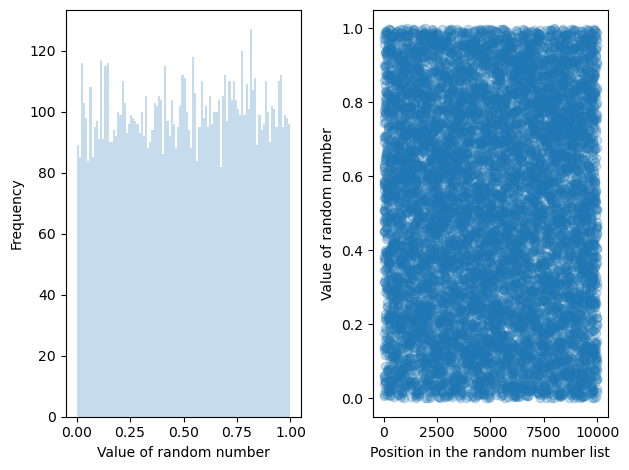

In [3]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.tight_layout()

### 1.4 Uniformly beyond \([0,1)\)

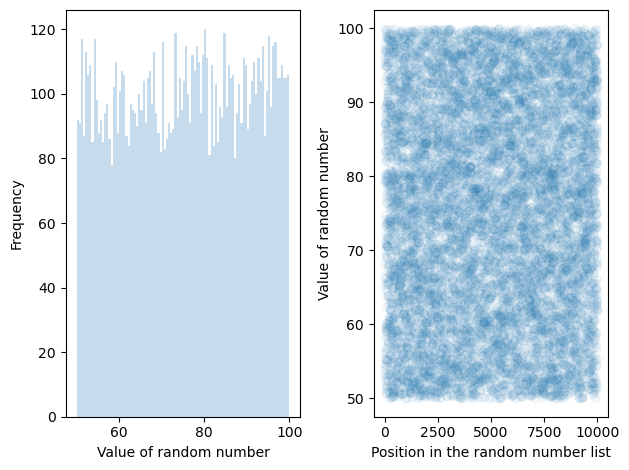

In [5]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n)
fig, ax = plt.subplots(nrows=1, ncols=2)

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.05)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")
plt.tight_layout()

### 1.5 ‘seeding’ a PRNG

In [6]:
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([19, 64, 14,  3, 41, 16, 60, 40, 97, 29])

In [7]:
np.random.randint(0, 100, 10)     # Another ten integers between 0 and 100

array([87, 80, 27, 92, 72, 75, 68, 77, 60,  8])

In [8]:
np.random.seed(1234)              # Specifying a seed
np.random.randint(0, 100, 10)     # Ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [10]:
np.random.seed(1235)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([75, 34,  2, 67, 71, 35, 54, 16, 16, 50])

In [11]:
np.random.seed(1235)
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([75, 34,  2, 67, 71, 35, 54, 16, 16, 50])

## 2 Simulating a Magic-8 Ball

In [13]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options)

In [14]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n')

Q: Will I be pretty?
A: Without a doubt.

Q: Will I be rich?
A: Don't count on it.

Q: Will I be in trouble?
A: Concentrate and ask again.



## 3 Flipping Coins

### 3.1 A fair coin

In [22]:
np.random.choice(['Head', 'Tails'])

'Head'

In [23]:
no_of_coins = 10
test = np.random.choice(['Head', 'Tails'], no_of_coins)

sum(test == 'Head')


5

In [9]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads

In [10]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 45.40%


### 3.2 A biased coin

In [11]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 69.90%


### 3.3 A flipping experiment

In [13]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)]
no_of_heads, heads_counts = np.unique(result, return_counts=True)

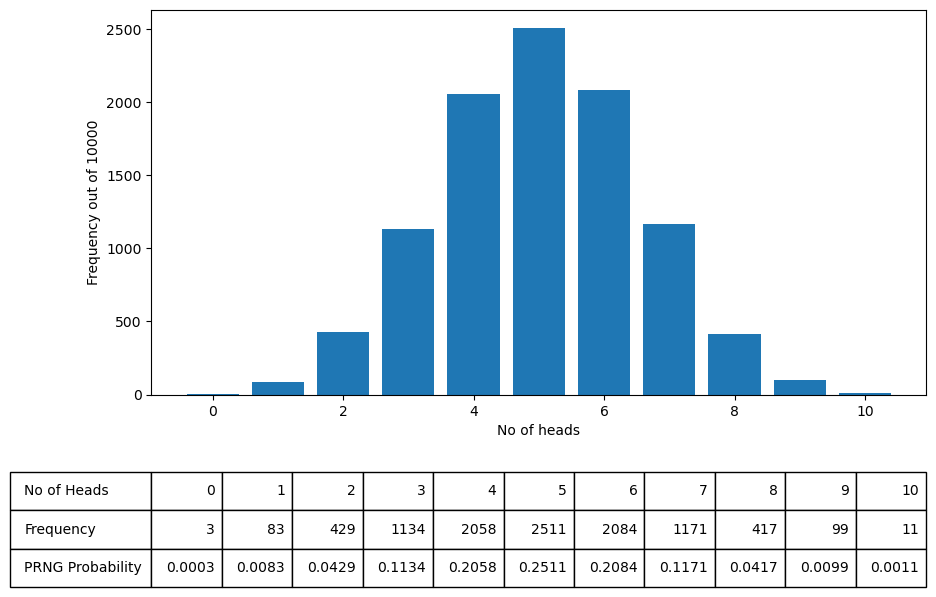

In [16]:
heads_probability = heads_counts/no_of_repeats
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [2]:
from scipy.stats import binom

In [5]:
x = binom.pmf(k=7, n=10, p=.5)
print(x)

0.11718749999999996


[0.00097656 0.00976563 0.04394531 0.1171875  0.20507812 0.24609375
 0.20507812 0.1171875  0.04394531 0.00976563 0.00097656]


<BarContainer object of 11 artists>

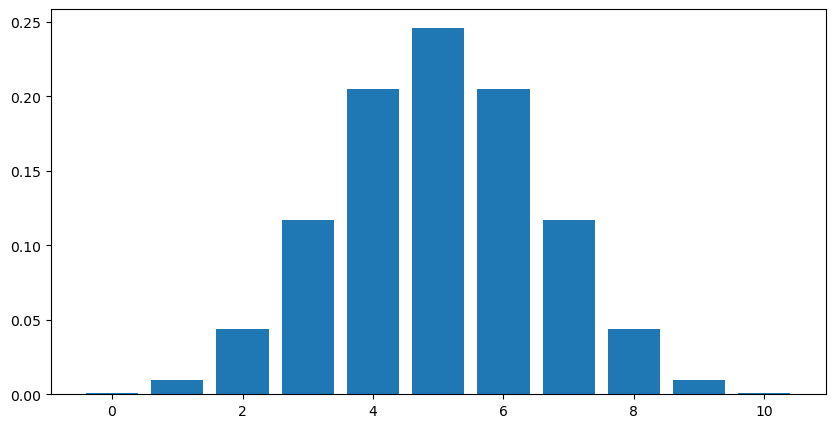

In [19]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)
print(binomial_probabilities)
plt.bar(no_of_heads, binomial_probabilities)


## Exercise 1 :  12C, 13C

In [27]:
def carbon(no_of_atoms = 1, probability = 0.9889):
    results = np.random.rand(no_of_atoms)
    no_of_atoms = np.sum(results > probability)
    return no_of_atoms
np.mean(carbon(27))

0.0

<BarContainer object of 28 artists>

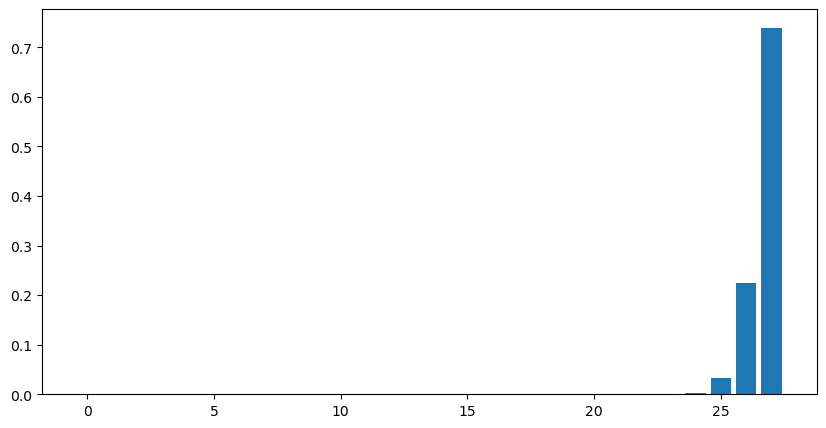

In [34]:
no_of_atoms = range(28)
wow = binom.pmf(k = no_of_atoms, n = 27, p = 0.9889)
plt.bar(no_of_atoms, wow)

In [45]:
def flip_coins(no_of_coins=1, probability=.9889):
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads
flip_coins(27)



0

In [106]:
trials = 100000
x = 0
y = []
while x < trials:
    y.append(flip_coins(27))
    x += 1
mean = np.mean(y)
standard = np.std(y)
print(f'mean = {mean}')
print(f'Standard Div = {standard}')

mean = 0.29929
Standard Div = 0.5462558886639117


In [88]:
def carbon(atoms = 1, probability = 0.9889):
    results = np.random.rand(atoms)
    no_of_atoms = np.sum(results > probability)
    return no_of_atoms
atoms = 100000
no_of_atoms = carbon(27)
print(f'Proability of no C13: {no_of_atoms / atoms*100:.2f}%')

Proability of no C13: 0.00%


In [95]:
no_carbon = carbon(27, probability = 0.9889)
print(no_carbon)

0


In [105]:
test = 100000
x = 0
y = []
while x < test:
    x += 1
    no_carbon = carbon(27, probability = 0.9889)
    y.append(no_carbon)
z = np.array(y)
print(f' P = {np.sum(z == 0)/test}')


 P = 0.74055
